# RNN Recurrent Neural Network

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Flatten, Dense, LSTM, SimpleRNN

import pandas as pd
import numpy as np

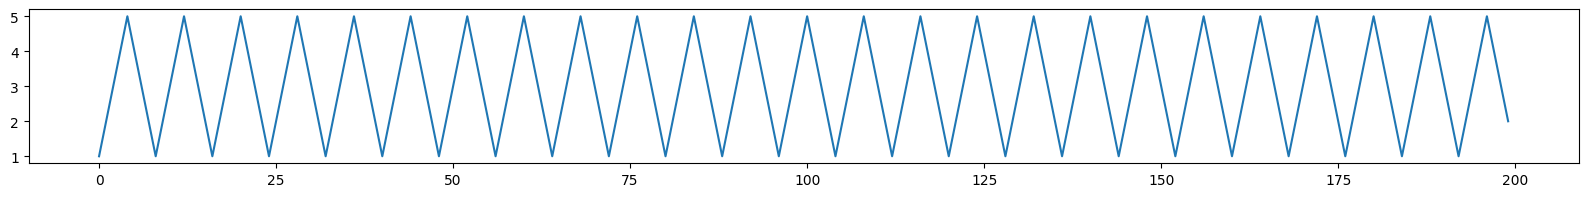

In [2]:
# Generate a Sample Time Series
ts_length = 25
time_series = []
for i in range(ts_length):
    time_series += [1,2,3,4,5,4,3,2]   

plt.figure(figsize=(20,2))
plt.plot(time_series)

In [3]:
# Specify the Prection Interval
prediction_interval = 3

# Data, label sequence
features = []
labels = []
for i in range(len(time_series)-prediction_interval):
    features.append(time_series[i : i + prediction_interval])
    labels.append(time_series[i + prediction_interval])

# Train test split
train_size = int(len(time_series)*.90)

features_train = features[0:train_size]
features_test = features[train_size:]

labels_train = labels[:train_size]
labels_test = labels[train_size:]
    
    
# Reshape the data
# Reshpae the training data to number of observations, number of features, number of time series
X_train = np.array(features_train).reshape(len(features_train), prediction_interval, 1)
X_test = np.array(features_test).reshape(len(features_test), prediction_interval, 1)

# Reshpae the testing data to number of observations, number of values
y_train = np.array(labels_train).reshape(len(labels_train),1)

# Verify the shapes are compatable
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(np.array(labels_test).shape)

(180, 3, 1)
(180, 1)
(17, 3, 1)
(17,)


In [4]:
# Input Layer
input_layer = Input(shape = (3,1))

# First simple RNN layer
x = SimpleRNN(20, return_sequences=True)(input_layer)

# Second LSTM Layer - Long/short term memory
x = LSTM(20)(x)

# Dense feed forward layer
x = Dense(10)(x)

# Output_layer
output_layer = Dense(1)(x)

model = Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 lstm (LSTM)                 (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,941
Trainable params: 3,941
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile and fit the model
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=300, batch_size = 32)

Epoch 1/300
6/6 [==============================] - 1s 3ms/step - loss: 9.7857
Epoch 2/300
6/6 [==============================] - 0s 4ms/step - loss: 6.5701
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 4.1453
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 2.5643
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.7562
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 1.5388
Epoch 7/300
6/6 [==============================] - 0s 4ms/step - loss: 1.5842
Epoch 8/300
6/6 [==============================] - 0s 4ms/step - loss: 1.5406
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.4585
Epoch 10/300
6/6 [==============================] - 0s 4ms/step - loss: 1.3959
Epoch 11/300
6/6 [==============================] - 0s 4ms/step - loss: 1.3748
Epoch 12/300
6/6 [==============================] - 0s 3ms/step - loss: 1.3419
Epoch 13/300
6/6 [==============================] - 0s 3ms/st

Epoch 203/300
6/6 [==============================] - 0s 3ms/step - loss: 5.3549e-08
Epoch 204/300
6/6 [==============================] - 0s 3ms/step - loss: 4.6336e-08
Epoch 205/300
6/6 [==============================] - 0s 4ms/step - loss: 4.5920e-08
Epoch 206/300
6/6 [==============================] - 0s 3ms/step - loss: 3.8177e-08
Epoch 207/300
6/6 [==============================] - 0s 3ms/step - loss: 3.4886e-08
Epoch 208/300
6/6 [==============================] - 0s 3ms/step - loss: 3.0361e-08
Epoch 209/300
6/6 [==============================] - 0s 3ms/step - loss: 2.7791e-08
Epoch 210/300
6/6 [==============================] - 0s 3ms/step - loss: 2.5383e-08
Epoch 211/300
6/6 [==============================] - 0s 3ms/step - loss: 2.1211e-08
Epoch 212/300
6/6 [==============================] - 0s 3ms/step - loss: 2.0135e-08
Epoch 213/300
6/6 [==============================] - 0s 2ms/step - loss: 1.7424e-08
Epoch 214/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5

In [6]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 362ms/step


In [7]:
# Reshape the predicted values to one dimension for easier plotting
predictions = predictions.reshape(predictions.shape[0])

In [8]:
# Create dataframes with the corresponding index for subsequent plotting
df = pd.DataFrame({'value': labels_train}).reset_index()

prediction_index = []
for i in range(len(labels_test)):
    prediction_index.append(i + len(labels_train))
    
df_predict = pd.DataFrame({'index': prediction_index, 
                           'predicted': predictions, 'actual': labels_test})

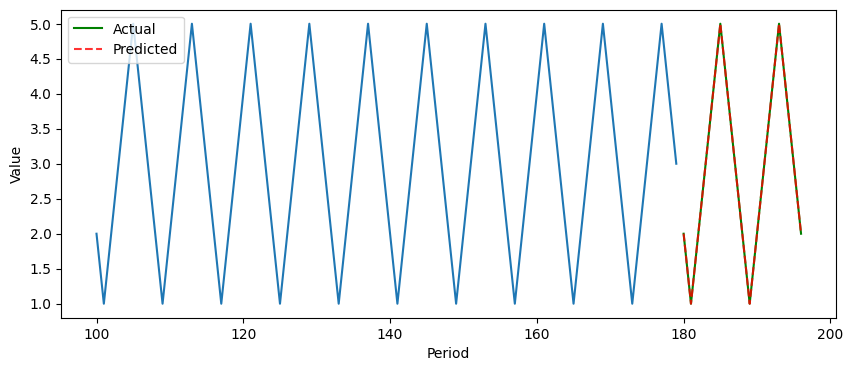

In [20]:
# Plot the data, and predicted values

plt.figure(figsize=(10,4))

# Plot the training values
plt.plot(df['index'][100:],df['value'][100:])

# Plot the true labels
plt.plot(df_predict['index'], df_predict['actual'], label='Actual', color='green')

# Plot the predicted values
plt.plot(df_predict['index'], df_predict['predicted'], label='Predicted', 
         color='red',ls='--',alpha = 0.8)

plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()